# Package Installation 

In [1]:
%%capture
def inst():
        !pip install -U sentence-transformers
        !pip install sentence_transformers
        !pip install transformers
        !pip install datasets
        !pip install stop_words
        #!pip install flair 
        !pip install scipy 
        !pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
inst()

# Data Preprocessing

In [2]:
# Data Preprocessing to retieve the texts with the multiple labels
%%capture
from datasets import load_dataset
from collections import defaultdict
import re
import random
import numpy as np
import operator
import matplotlib.pyplot as plt
#from transformers import pipeline
from pylab import rcParams
import sys 
import nltk
import re
nltk.download('punkt')
import csv
import pandas as pd
import sys
samelocation=defaultdict(list)

reuters= load_dataset('reuters21578', 'ModApte')

random.seed(1)

def clean(label):
    label = re.sub("([a-z])([A-Z])", "\\1 \\2", label)
    label = label.replace("_", " ")
    return label


def sample_test_data(texts,  labels, title, size):
    data = list(zip(texts, labels,title))
    data = [item for item in data if len(item[0]) > 0]
    random.shuffle(data)
    texts, labels,title = zip(*data)
    return texts[:size], labels[:size], title[:size],texts[size:], labels[size:]
reuters_train_texts, reuters_train_labels,title, _, _ = sample_test_data(reuters['train'], reuters['train']['topics'],reuters['train']['places'], 50000)
#reuters_train_texts, reuters_train_labels,labels, _ = sample_test_data(reuters['train'], reuters['train']['topics'],reuters['train']['places'], 50000)
#labels,_ = sample_test_data( reuters['train']['places'], 50000)
txt_place={}
place_tx=[]
for t in title:
    for kk in t:
        place_tx.append(kk)
same_tp=[]
for hh in reuters_train_labels:
    for kk in hh:
       same_tp.append(kk)
sm_topic=defaultdict(list)
txt=[]

import nltk
nltk.download('wordnet')
import nltk
from stop_words import get_stop_words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(get_stop_words('en'))         #Have around 900 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 150 stopwords
stop_words.extend(nltk_words)
rttext_tag={}
label_class=[]
WORDS_ev={}
sintag={}
eid_maps={}
eid_mapm={}
rid=0
rd_txt={}
txt_rd={}
#
rttext_tags={}
label_classs=[]
WORDS_evs={}
sintags={}
eid_mapss={}
eid_mapms={}
rids=0
rd_txts={}
txt_rds={}

for hh in range(len(reuters_train_labels)):
  if len(reuters_train_labels[hh])>0 and len(reuters_train_texts[hh]['text'].split())>0:
                  zz=reuters_train_labels[hh]
                  #print(title[hh])
                  #sys.exit()
                  #print("text"+"\n")
                  if len(zz)>1 and len(zz)<=3:
                          vcc=0
                          jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh]['text'])
                          from nltk.tokenize import word_tokenize
                          tokens = word_tokenize(jj)
                          # convert to lower case
                          tokens = [w.lower() for w in tokens]
                          # remove punctuation from each word
                          import string
                          table = str.maketrans('', '', string.punctuation)
                          stripped = [w.translate(table) for w in tokens]
                          # remove remaining tokens that are not alphabetic
                          words = [word for word in stripped if word.isalpha()]
                          # filter out stop words
                          from nltk.corpus import stopwords
                          stop_words = set(stopwords.words('english'))
                          words = [w for w in words if not w in stop_words and len(w)>2]
                          wrd=[]
                          sz=''
                          for k in words:
                             # if vcc<150:
                                wrd.append(k)
                                vcc=vcc+1
                          #rttext_tag[wrd]=zz[0]
                          if len(wrd)>=2:
                              WORDS_ev[rid]=wrd
                              #rid=rid+1
                              for vv in wrd:
                                if vv!='reuter':
                                    sz=sz+vv+" "
                            #print(zz,sz)
                              for kk in zz:
                                if kk not in label_class:
                                    label_class.append(kk)
                              rttext_tag[sz]=zz
                              txt_place[sz]=title[hh]
                              samelocation[place_tx[hh]].append(sz)
                              sm_topic[same_tp[hh]].append(rid)
                              sintag[sz]=zz[0:1]
                              eid_maps[rid]=zz[0:1]
                              eid_mapm[rid]=zz
                              rd_txt[rid]=sz
                              txt_rd[sz]=rid
                              rid=rid+1
                          #print(reuters_train_texts[hh]['text'].split())
                          #txt.append(reuters_train_texts[hh]['text'])
                          #print("\n\n")
                  elif len(zz)==1:
                                        vcc=0
                                        jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh]['text'])
                                        from nltk.tokenize import word_tokenize
                                        tokens = word_tokenize(jj)
                                        # convert to lower case
                                        tokens = [w.lower() for w in tokens]
                                        # remove punctuation from each word
                                        import string
                                        table = str.maketrans('', '', string.punctuation)
                                        stripped = [w.translate(table) for w in tokens]
                                        # remove remaining tokens that are not alphabetic
                                        words = [word for word in stripped if word.isalpha()]
                                        # filter out stop words
                                        from nltk.corpus import stopwords
                                        stop_words = set(stopwords.words('english'))
                                        words = [w for w in words if not w in stop_words and len(w)>=4]
                                        wrd=[]
                                        sz=''
                                        for k in words:
                                            if vcc<150:
                                                wrd.append(k)
                                                vcc=vcc+1
                                        #rttext_tag[wrd]=zz[0]
                                        if len(wrd)>=5:
                                            WORDS_evs[rid]=wrd
                                            #rid=rid+1
                                            for vv in wrd:
                                                if vv!='reuter':
                                                    sz=sz+vv+" "
                                            #print(zz,sz)
                                            for kk in zz:
                                                if kk not in label_classs:
                                                    label_classs.append(kk)
                                            rttext_tags[sz]=zz
                                            sintags[sz]=zz#[0:1]
                                            eid_mapss[rid]=zz#[0:1]
                                            eid_mapms[rid]=zz
                                            rd_txts[rid]=sz
                                            txt_rds[sz]=rid
                                            rids=rids+1





for tt in txt_place:
    pass#print
rttext_tag2=rttext_tag
#rttext_tagh1=rttext_tag

In [3]:
# Unique Tags: Getting the number of unique classes
untr=[]
str1=[]
for vv in rttext_tag2:
    for kk in rttext_tag2[vv]:
        if kk not in str1:
            str1.append(kk)
s=set(str1)
for zz in s:
    untr.append(zz)
#Checking Unique Tags
#print(len(untr))
for vv in untr:
    pass#print(vv)

In [4]:
# Count the number of texts per tag and new assignment withe frequent tag class
rttext_tags3={}
untr1=[]
def zsn(rttext_tag2,tags):
    cc=0
    fg=[]
    for tt in rttext_tag2:
        if tags in rttext_tag2[tt]:
            cc=cc+1
    return tags,cc

ptg={}
for tt in untr:
    tags,cc=zsn(rttext_tag2,tt)
    if cc>100:
        untr1.append(tags)
        ptg[tags]=cc


print(len(ptg))
for vv in ptg:
    #if ptg[vv]>=100:
         print(vv,ptg[vv])

for vc in rttext_tag2:
       vb=[]
       for ty in ptg:
           if ty in rttext_tag2[vc]:
               vb.append(ty)
               break
           else:
                continue
       if len(vb)>0:
          rttext_tags3[vc]=rttext_tag2[vc]
for kk in rttext_tags3:
      pass#print(rttext_tags3[kk])
untr1=['money-fx', 'wheat', 'crude', 'grain', 'corn']
print(untr1)
print(len(rttext_tags3))

6
wheat 150
grain 280
interest 137
crude 120
money-fx 246
corn 104
['money-fx', 'wheat', 'crude', 'grain', 'corn']
661


In [ ]:
 'grain','money-fx','wheat','interest', and 'crude'

# Performing Inference for the zero-shot and the supervised models

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
import operator
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams
import sys 
import nltk
import re
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
def zsn(rttext_tags3,tags):
        cc=0
        cc1=0
        vz='non'+str(tags)
        Train_X=[] 
        Test_X=[]
        Train_Y=[]
        Test_Y=[]
        # = model_selection.train_test_split(dt,lb,test_size=0.5)
        ct1=0
        ct2=100

        cs1=0
        cs2=100
        rttext_tagh1={}

        for tt in rttext_tags3:
            gh=[]
            gh1=[]
            for kk in rttext_tags3[tt]:
                if tags in kk:
                    #print(kk)
                    #cc=cc+1
                    if tt not in rttext_tagh1:
                        if cc<50:
                            gh.append(tags)
                            if len(rttext_tagh1)<=100:
                                rttext_tagh1[tt]=gh
                                cc=cc+1
                            #break
                elif tags not in kk:
                    if tt not in rttext_tagh1:
                        if cc1<50:
                            gh1.append(vz)
                            if len(rttext_tagh1)<=100:
                                rttext_tagh1[tt]=gh1
                                cc1=cc1+1
                            #break
        lbu=[tags,vz]
        #if tags=='wheat':
             #print(len(rttext_tagh1))
             #for kk in rttext_tagh1:
                    #print(rttext_tagh1[kk])
        #sys.exit()


        zero_shot_classifier = pipeline("zero-shot-classification")
        def review_explain(text):
                result = zero_shot_classifier(sequences =text,candidate_labels =lbu ,multi_label=False)
                
                return result['labels'],result['scores']


        txt_lbp={}
        for jj in rttext_tagh1:
            cl,sc=review_explain(jj)
            ghh=[]
            ghh.append(cl[0])
            txt_lbp[jj]=ghh
        #F1 Score
        pd=[]
        tr=[]
        for tt in txt_lbp:
            if tt in rttext_tagh1:
                pd.append(str(txt_lbp[tt][0]))
                tr.append(str(rttext_tagh1[tt][0]))
        from sklearn.metrics import f1_score
        #print(f1_score(tr, pd, average='micro'))
        zrp=f1_score(tr, pd, average='micro')
        print(" Zero-shot prediction for the Class: "+str(tags)+"\n")
        print(zrp)

        '''
        #F1 Score
        pd=[]
        tr=[]
        for tt in txt_lbp:
            if tt in rttext_tagh1:
                pd.append(str(txt_lbp[tt][0]))
                tr.append(str(rttext_tagh1[tt][0]))
        from sklearn.metrics import f1_score
        print(f1_score(tr, pd, average='micro'))

        # data and label train test
        Train_X=[] 
        Test_X=[]
        Train_Y=[]
        Test_Y=[]
        # = model_selection.train_test_split(dt,lb,test_size=0.5)
        ct1=0
        ct2=100

        cs1=0
        cs2=100
        dt=[]
        lb=[]
        for hh in rttext_tagh1:
            gg=hh.split()
            for nn in rttext_tagh1[hh]:
                for kk in gg:
                    if kk not in dt:
                        dt.append(kk)
                        lb.append(nn)
        print(len(dt),len(lb))
        l1=len(dt)//2
        l2=len(lb)//2
        for bb in range(0,l1):
            if lb[bb]=='gas':
                Train_X.append(dt[bb])
                Train_Y.append(lb[bb])
        for bb in range(l1,len(dt)):
            if lb[bb]=='gas':
                Test_X.append(dt[bb])
                Test_Y.append(lb[bb])
        for bb in range(0,l1):
            if lb[bb]=='acq':
                Train_X.append(dt[bb])
                Train_Y.append(lb[bb])
        for bb in range(l1,len(dt)):
            if lb[bb]=='acq':
                Test_X.append(dt[bb])
                Test_Y.append(lb[bb])

        print(len(Train_X),len(Train_Y),len(Test_X),len(Test_Y))
        '''
        # data and label train test
       # Train_X=[] 
        #Test_X=[]
        #Train_Y=[]
        #Test_Y=[]
        # = model_selection.train_test_split(dt,lb,test_size=0.5)
        ct1=0
        ct2=100

        cs1=0
        cs2=100
        dt=[]
        lb=[]
        for hh in rttext_tagh1:
            gg=hh.split()
            for nn in rttext_tagh1[hh]:
                for kk in gg:
                    if kk not in dt:
                        dt.append(kk)
                        lb.append(nn)
        print(len(dt),len(lb))
        l1=len(dt)//2
        l2=len(lb)//2
        for bb in range(0,l1):
            if lb[bb]==tags:
                pass#Train_X.append(dt[bb])
                pass#Train_Y.append(tags)
        for bb in range(l1,len(dt)):
            if lb[bb]==tags:
                pass#Test_X.append(dt[bb])
                pass#Test_Y.append(tags)
        for bb in range(0,l1):
            if vz in lb[bb]:
                pass#Train_X.append(dt[bb])
                pass#Train_Y.append(vz)
        for bb in range(l1,len(dt)):
            if vz in lb[bb]:
                pass#Test_X.append(dt[bb])
                pass#Test_Y.append(vz)

       # print(len(Train_X),len(Train_Y),len(Test_X),len(Test_Y))
        Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(dt,lb,test_size=0.5)
        #import sys
       # print



        Tfidf_vect = TfidfVectorizer(max_features=5000)
        #Tfidf_vect.fit(Train_X)
        f = Tfidf_vect.fit_transform(dt)
        Train_X_Tfidf = Tfidf_vect.fit_transform(Train_X)
        Test_X_Tfidf = Tfidf_vect.transform(Test_X)
        # Classifier - Algorithm - SVM
        # fit the training dataset on the classifier
        SVM = svm.SVC(C=50.0, kernel='linear') #svm.LinearSVC(C=1)#
        SVM.fit(Train_X_Tfidf,Train_Y)
        # predict the labels on validation dataset
        predictions_SVM = SVM.predict(Test_X_Tfidf)
        # Use accuracy_score function to get the accuracy
        #print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
        from sklearn.metrics import f1_score
        #print(f1_score(Test_Y, predictions_SVM, average='weighted'))
        svmp=f1_score(Test_Y, predictions_SVM, average='micro')
        print(" SVM prediction for the Class: "+str(tags)+"\n")
        print(svmp)

        ## naive bayes
        Naive = naive_bayes.MultinomialNB()
        Naive.fit(Train_X_Tfidf,Train_Y)
        # predict the labels on validation dataset
        predictions_NB = Naive.predict(Test_X_Tfidf)
        # Use accuracy_score function to get the accuracy
        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
        from sklearn.metrics import f1_score
        #print(f1_score(Test_Y, predictions_NB, average='micro'))
        nvp=f1_score(Test_Y, predictions_NB, average='micro')
        print(" Naive Bayes prediction for the Class: "+str(tags)+"\n")
        print(nvp)
        # Random fores
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier(max_depth=2, random_state=0)
        clf.fit(Train_X_Tfidf,Train_Y)
        predictions_rf = clf.predict(Test_X_Tfidf)
        # Use accuracy_score function to get the accuracy
        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
        from sklearn.metrics import f1_score
        #print(f1_score(Test_Y, predictions_NB, average='micro'))
        rfp=f1_score(Test_Y, predictions_rf, average='micro')
        print(" Random Forest prediction for the Class: "+str(tags)+"\n")
        print(rfp)
        # Bagging
        from sklearn.ensemble import BaggingClassifier
        from sklearn.svm import SVC
        clf1=BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
        clf1.fit(Train_X_Tfidf,Train_Y)
        predictions_bg = clf1.predict(Test_X_Tfidf)
        # Use accuracy_score function to get the accuracy
        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
        from sklearn.metrics import f1_score
        #print(f1_score(Test_Y, predictions_NB, average='micro'))
        bgp=f1_score(Test_Y, predictions_bg, average='micro')
        print(" Bagging prediction for the Class: "+str(tags)+"\n")
        print(bgp)
        # Decision Trees
        from sklearn.tree import DecisionTreeClassifier
        clf2 = DecisionTreeClassifier(random_state=0)
        clf2.fit(Train_X_Tfidf,Train_Y)
        predictions_dc = clf2.predict(Test_X_Tfidf)
        # Use accuracy_score function to get the accuracy
        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
        from sklearn.metrics import f1_score
        #print(f1_score(Test_Y, predictions_NB, average='micro'))
        dcp=f1_score(Test_Y, predictions_dc, average='micro')
        print(" Decision Tree prediction for the Class: "+str(tags)+"\n")
        print(dcp)
        # KNN
        from sklearn.neighbors import KNeighborsClassifier
        clf3 = KNeighborsClassifier(n_neighbors=5)
        clf3.fit(Train_X_Tfidf,Train_Y)
        predictions_kn = clf3.predict(Test_X_Tfidf)
        # Use accuracy_score function to get the accuracy
        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
        from sklearn.metrics import f1_score
        #print(f1_score(Test_Y, predictions_NB, average='micro'))
        knp=f1_score(Test_Y, predictions_kn, average='micro')
        print(" KNN prediction for the Class: "+str(tags)+"\n")
        print(knp)
        return zrp,svmp,nvp,rfp,bgp,dcp,knp
zsn_p={}
for tt in untr1:
    try:
        ggh=[]
        zrp,svmp,nvp,rfp,bgp,dcp,knp =zsn(rttext_tags3,tt)
        ggh.append(zrp)
        ggh.append(svmp)
        ggh.append(nvp)
        ggh.append(rfp)
        #ggh.append(bgp)
        ggh.append(dcp)
        #ggh.append(knp)
        if len(ggh)>1:
            zsn_p[tt]=ggh
    except:
        continue





#Computing Average F-1 score

In [ ]:
# average f1 scores 
rtz_zs=[]
def f1avg(nn):
        s=0
        for tt in zsn_p:
            for vv in range(0,len(zsn_p[tt])):
                if vv==nn:
                    s=s+zsn_p[tt][vv]
                    #print(zsn_p[tt][vv])
        cv=s/len(zsn_p)
        return cv
for nn in range(0,5):
    sc=f1avg(nn)
    rtz_zs.append(sc)
print(rtz_zs)


# The Average F-1 scores per dominant classes for the zero-shot and the supervised models

In [ ]:
for tt in zsn_p:
    print(tt,zsn_p[tt])

In [ ]:
## Testing the Stability of the models


In [ ]:
#Statistocs

## Computing the standard deviation

In [ ]:
wheat=[0.83, 0.7335140018066847, 0.7335140018066847, 0.7335140018066847, 0.7335140018066847]
#interest=[0.51, 0.6588139723801787, 0.6588139723801787, 0.6588139723801787, 0.6588139723801787]
money_fx=[0.65, 0.6121164437450826, 0.6121164437450826, 0.6121164437450826, 0.6121164437450826]
corn=[0.7699999999999999, 0.6697872340425531, 0.6697872340425531, 0.6697872340425531, 0.6697872340425531]
crude=[0.68, 0.52990851513019, 0.52990851513019, 0.52990851513019, 0.52990851513019]
grain=[0.82, 0.6061806656101426, 0.6061806656101426, 0.6061806656101426, 0.6061806656101426]


In [5]:
%%capture
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
import operator
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams
import sys 
import nltk
import re
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
def run1():
                def zsn(rttext_tags3,tags):
                        cc=0
                        cc1=0
                        vz='non'+str(tags)
                        Train_X=[] 
                        Test_X=[]
                        Train_Y=[]
                        Test_Y=[]
                        # = model_selection.train_test_split(dt,lb,test_size=0.5)
                        ct1=0
                        ct2=100

                        cs1=0
                        cs2=100
                        rttext_tagh1={}

                        for tt in rttext_tags3:
                            gh=[]
                            gh1=[]
                            for kk in rttext_tags3[tt]:
                                if tags in kk:
                                    #print(kk)
                                    #cc=cc+1
                                    if tt not in rttext_tagh1:
                                        if cc<100:
                                            gh.append(tags)
                                            if len(rttext_tagh1)<=200:
                                                rttext_tagh1[tt]=gh
                                                cc=cc+1
                                            #break
                                elif tags not in kk:
                                    if tt not in rttext_tagh1:
                                        if cc1<100:
                                            gh1.append(vz)
                                            if len(rttext_tagh1)<=200:
                                                rttext_tagh1[tt]=gh1
                                                cc1=cc1+1
                                            #break
                        lbu=[tags,vz]
                        #if tags=='wheat':
                            #print(len(rttext_tagh1))
                            #for kk in rttext_tagh1:
                                    #print(rttext_tagh1[kk])
                        #sys.exit()


                        zero_shot_classifier = pipeline("zero-shot-classification")
                        def review_explain(text):
                                result = zero_shot_classifier(sequences =text,candidate_labels =lbu ,multi_label=False)
                                
                                return result['labels'],result['scores']


                        txt_lbp={}
                        for jj in rttext_tagh1:
                            cl,sc=review_explain(jj)
                            ghh=[]
                            ghh.append(cl[0])
                            txt_lbp[jj]=ghh
                        #F1 Score
                        pd=[]
                        tr=[]
                        for tt in txt_lbp:
                            if tt in rttext_tagh1:
                                pd.append(str(txt_lbp[tt][0]))
                                tr.append(str(rttext_tagh1[tt][0]))
                        from sklearn.metrics import f1_score
                        #print(f1_score(tr, pd, average='micro'))
                        zrp=f1_score(tr, pd, average='micro')
                        print(" Zero-shot prediction for the Class: "+str(tags)+"\n")
                        print(zrp)

                        '''
                        #F1 Score
                        pd=[]
                        tr=[]
                        for tt in txt_lbp:
                            if tt in rttext_tagh1:
                                pd.append(str(txt_lbp[tt][0]))
                                tr.append(str(rttext_tagh1[tt][0]))
                        from sklearn.metrics import f1_score
                        print(f1_score(tr, pd, average='micro'))

                        # data and label train test
                        Train_X=[] 
                        Test_X=[]
                        Train_Y=[]
                        Test_Y=[]
                        # = model_selection.train_test_split(dt,lb,test_size=0.5)
                        ct1=0
                        ct2=100

                        cs1=0
                        cs2=100
                        dt=[]
                        lb=[]
                        for hh in rttext_tagh1:
                            gg=hh.split()
                            for nn in rttext_tagh1[hh]:
                                for kk in gg:
                                    if kk not in dt:
                                        dt.append(kk)
                                        lb.append(nn)
                        print(len(dt),len(lb))
                        l1=len(dt)//2
                        l2=len(lb)//2
                        for bb in range(0,l1):
                            if lb[bb]=='gas':
                                Train_X.append(dt[bb])
                                Train_Y.append(lb[bb])
                        for bb in range(l1,len(dt)):
                            if lb[bb]=='gas':
                                Test_X.append(dt[bb])
                                Test_Y.append(lb[bb])
                        for bb in range(0,l1):
                            if lb[bb]=='acq':
                                Train_X.append(dt[bb])
                                Train_Y.append(lb[bb])
                        for bb in range(l1,len(dt)):
                            if lb[bb]=='acq':
                                Test_X.append(dt[bb])
                                Test_Y.append(lb[bb])

                        print(len(Train_X),len(Train_Y),len(Test_X),len(Test_Y))
                        '''
                        # data and label train test
                    # Train_X=[] 
                        #Test_X=[]
                        #Train_Y=[]
                        #Test_Y=[]
                        # = model_selection.train_test_split(dt,lb,test_size=0.5)
                        ct1=0
                        ct2=100

                        cs1=0
                        cs2=100
                        dt=[]
                        lb=[]
                        for hh in rttext_tagh1:
                            gg=hh.split()
                            for nn in rttext_tagh1[hh]:
                                for kk in gg:
                                    if kk not in dt:
                                        dt.append(kk)
                                        lb.append(nn)
                        print(len(dt),len(lb))
                        l1=len(dt)//2
                        l2=len(lb)//2
                        for bb in range(0,l1):
                            if lb[bb]==tags:
                                pass#Train_X.append(dt[bb])
                                pass#Train_Y.append(tags)
                        for bb in range(l1,len(dt)):
                            if lb[bb]==tags:
                                pass#Test_X.append(dt[bb])
                                pass#Test_Y.append(tags)
                        for bb in range(0,l1):
                            if vz in lb[bb]:
                                pass#Train_X.append(dt[bb])
                                pass#Train_Y.append(vz)
                        for bb in range(l1,len(dt)):
                            if vz in lb[bb]:
                                pass#Test_X.append(dt[bb])
                                pass#Test_Y.append(vz)

                    # print(len(Train_X),len(Train_Y),len(Test_X),len(Test_Y))
                        Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(dt,lb,test_size=0.5)
                        #import sys
                    # print



                        Tfidf_vect = TfidfVectorizer(max_features=5000)
                        #Tfidf_vect.fit(Train_X)
                        f = Tfidf_vect.fit_transform(dt)
                        Train_X_Tfidf = Tfidf_vect.fit_transform(Train_X)
                        Test_X_Tfidf = Tfidf_vect.transform(Test_X)
                        # Classifier - Algorithm - SVM
                        # fit the training dataset on the classifier
                        SVM = svm.SVC(C=50.0, kernel='linear') #svm.LinearSVC(C=1)#
                        SVM.fit(Train_X_Tfidf,Train_Y)
                        # predict the labels on validation dataset
                        predictions_SVM = SVM.predict(Test_X_Tfidf)
                        # Use accuracy_score function to get the accuracy
                        #print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
                        from sklearn.metrics import f1_score
                        #print(f1_score(Test_Y, predictions_SVM, average='weighted'))
                        svmp=f1_score(Test_Y, predictions_SVM, average='micro')
                        print(" SVM prediction for the Class: "+str(tags)+"\n")
                        print(svmp)

                        ## naive bayes
                        Naive = naive_bayes.MultinomialNB()
                        Naive.fit(Train_X_Tfidf,Train_Y)
                        # predict the labels on validation dataset
                        predictions_NB = Naive.predict(Test_X_Tfidf)
                        # Use accuracy_score function to get the accuracy
                        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
                        from sklearn.metrics import f1_score
                        #print(f1_score(Test_Y, predictions_NB, average='micro'))
                        nvp=f1_score(Test_Y, predictions_NB, average='micro')
                        print(" Naive Bayes prediction for the Class: "+str(tags)+"\n")
                        print(nvp)
                        # Random fores
                        from sklearn.ensemble import RandomForestClassifier
                        clf = RandomForestClassifier(max_depth=2, random_state=0)
                        clf.fit(Train_X_Tfidf,Train_Y)
                        predictions_rf = clf.predict(Test_X_Tfidf)
                        # Use accuracy_score function to get the accuracy
                        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
                        from sklearn.metrics import f1_score
                        #print(f1_score(Test_Y, predictions_NB, average='micro'))
                        rfp=f1_score(Test_Y, predictions_rf, average='micro')
                        print(" Random Forest prediction for the Class: "+str(tags)+"\n")
                        print(rfp)
                        # Bagging
                        from sklearn.ensemble import BaggingClassifier
                        from sklearn.svm import SVC
                        clf1=BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
                        clf1.fit(Train_X_Tfidf,Train_Y)
                        predictions_bg = clf1.predict(Test_X_Tfidf)
                        # Use accuracy_score function to get the accuracy
                        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
                        from sklearn.metrics import f1_score
                        #print(f1_score(Test_Y, predictions_NB, average='micro'))
                        bgp=f1_score(Test_Y, predictions_bg, average='micro')
                        print(" Bagging prediction for the Class: "+str(tags)+"\n")
                        print(bgp)
                        # Decision Trees
                        from sklearn.tree import DecisionTreeClassifier
                        clf2 = DecisionTreeClassifier(random_state=0)
                        clf2.fit(Train_X_Tfidf,Train_Y)
                        predictions_dc = clf2.predict(Test_X_Tfidf)
                        # Use accuracy_score function to get the accuracy
                        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
                        from sklearn.metrics import f1_score
                        #print(f1_score(Test_Y, predictions_NB, average='micro'))
                        dcp=f1_score(Test_Y, predictions_dc, average='micro')
                        print(" Decision Tree prediction for the Class: "+str(tags)+"\n")
                        print(dcp)
                        # KNN
                        from sklearn.neighbors import KNeighborsClassifier
                        clf3 = KNeighborsClassifier(n_neighbors=5)
                        clf3.fit(Train_X_Tfidf,Train_Y)
                        predictions_kn = clf3.predict(Test_X_Tfidf)
                        # Use accuracy_score function to get the accuracy
                        #print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
                        from sklearn.metrics import f1_score
                        #print(f1_score(Test_Y, predictions_NB, average='micro'))
                        knp=f1_score(Test_Y, predictions_kn, average='micro')
                        print(" KNN prediction for the Class: "+str(tags)+"\n")
                        print(knp)
                        return zrp,svmp,nvp,rfp,bgp,dcp,knp
                zsn_p={}
                for tt in untr1:
                    try:
                        ggh=[]
                        zrp,svmp,nvp,rfp,bgp,dcp,knp =zsn(rttext_tags3,tt)
                        ggh.append(zrp)
                        ggh.append(svmp)
                        ggh.append(nvp)
                        ggh.append(rfp)
                        #ggh.append(bgp)
                        ggh.append(dcp)
                        #ggh.append(knp)
                        if len(ggh)>1:
                            zsn_p[tt]=ggh
                    except:
                        continue

                # average f1 scores 
                rtz_zs=[]
                tb={}
                def f1avg(nn):
                        s=0
                        tb1=[]
                        for tt in zsn_p:
                            for vv in range(0,len(zsn_p[tt])):
                                if vv==nn:
                                    s=s+zsn_p[tt][vv]
                                    tb1.append(float(zsn_p[tt][vv]))
                                    #print(zsn_p[tt][vv])
                        cv=s/len(zsn_p)
                        return cv,tb1
                for nn in range(0,5):
                    sc,tb1=f1avg(nn)
                    rtz_zs.append(sc)
                    tb[nn]=tb1
                print(rtz_zs)
                return rtz_zs,tb
rtz_zs1={}
rtz_zs2={}
for kk in range(0,10):
    rtz_zs,tb=run1()
    rtz_zs1[kk]=rtz_zs
    rtz_zs2[kk]=tb








In [23]:
import statistics
zr=[]
zrr=[]
svm=[]
svmr=[]
nb=[]
nbr=[]
rf=[]
rfr=[]
dt=[]
dtr=[]
for kk in rtz_zs2:
   # print(kk)
        for tt in rtz_zs2[kk]:
            #print(tt,statistics.mean(rtz_zs2[kk][tt]),statistics.stdev(rtz_zs2[kk][tt]))
            if tt==0:
                zr.append(statistics.mean(rtz_zs2[kk][tt]))
                zrr.append(statistics.stdev(rtz_zs2[kk][tt]))
            elif tt==1:
                svm.append(statistics.mean(rtz_zs2[kk][tt]))
                svmr.append(statistics.stdev(rtz_zs2[kk][tt]))
            elif tt==2:
                nb.append(statistics.mean(rtz_zs2[kk][tt]))
                nbr.append(statistics.stdev(rtz_zs2[kk][tt]))
            elif tt==3:
                rf.append(statistics.mean(rtz_zs2[kk][tt]))
                rfr.append(statistics.stdev(rtz_zs2[kk][tt]))
            elif tt==4:
                dt.append(statistics.mean(rtz_zs2[kk][tt]))
                dtr.append(statistics.stdev(rtz_zs2[kk][tt]))


   # print("\n\n")
print(max(zrr))
print(max(svmr))
print(statistics.mean(zr))
print(statistics.mean(svm))

0.08543508332708218
0.09434470642507009
0.7671489361702127
0.6542150067930897


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

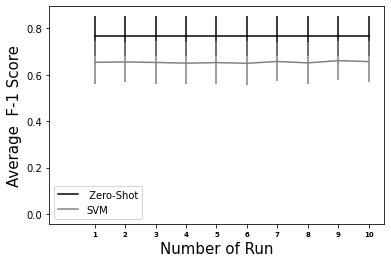

In [19]:
# Varying the number run 



#figures [0.334, 0.312, 0.28400000000000003, 0.268, 0.218]
#[0.0461519230368573, 0.084970583144992, 0.029664793948382655, 0.06140032573203501, 0.0363318042491699]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 
x1 = np.linspace(0, 20, 1000)


sw=[0.7075, 0.7224999999999999, 0.73, 0.7324999999999999, 0.7424999999999999]
swv=[0.0050000000000000044, 0.0050000000000000044, 0.0, 0.0050000000000000044, 0.0050000000000000044]#[0.0017000000000000008, 0.0006300000000000011, 0.00043000000000000075, 0.00013000000000000023, 0.00013000000000000023] #[0.45,0.52,0.55,0.61,0.70]
#sw1=[0.45,0.49,0.58,0.65,0.72] #0.15,0.29,
#srm1=[0.54,0.65,0.71,0.78,0.92]
src1=[0.725, 0.7375, 0.76, 0.775, 0.7825]
src1v=[0.005773502691896263, 0.0050000000000000044, 0.008164965809277268, 0.012909944487358068, 0.0050000000000000044]#[0.0002700000000000005, 0.00037000000000000065, 0.0004800000000000009, 0.0002200000000000004, 0.00025000000000000044]
rc1=[0.3125, 0.3125, 0.32, 0.3225, 0.3175]
rc1v=[0.0050000000000000044, 0.00957427107756339, 0.014142135623730963, 0.017078251276599347, 0.00957427107756339]

rc2=[0.5125, 0.5475000000000001, 0.55, 0.5475000000000001, 0.555]
rc2v=[0.00957427107756339, 0.00957427107756339, 0.008164965809277268, 0.015000000000000013, 0.012909944487358025]
#[0.33, 0.324, 0.29400000000000004, 0.378, 0.326]
#[0.08031189202104505, 0.09555103348473003, 0.057706152185014035, 0.050199601592044535, 0.07162401831787994]
#relation
#[0.334, 0.312, 0.28400000000000003, 0.268, 0.218]
#[0.0461519230368573, 0.084970583144992, 0.029664793948382655, 0.06140032573203501, 0.0363318042491699]
x2=0
y2=0
#plt.title('Comparison of accuracy of  feed back and without feedback using  bagging model with respect to annotated data')

#plt.grid(True)
#Lc1=['SHAP','LIME','20-Cluster','40-Cluster','60-Cluster','80-Cluster','100-Cluster']
#Lc1=['SHAP','LIME','25-Models','50-Models','100-Models','200-Models','300-Models']#['SVM','Extra_Trees','Bagging','RandomForest','Decision_Tress']
#Lc1=['0.01','0.02','0.03','0.04','0.05']
Lc1=['1','2','3','4','5','6','7','8','9','10']

#plt.hist(L22,density=100, bins=200) 
#plt.axis([0,6,0,50]) 
#axis([xmin,xmax,ymin,ymax])
#txt="Our Approach vs LIME for Spam"

# make some synthetic data


#fig = plt.figure()
#fig.text(.5, .015, txt, ha='center')
#plt.xlabel('Q6,Q7 and Q8 ')
#plt.xlabel('Reviews ')
plt.ylabel("Average  F-1 Score",fontsize=15)
plt.xlabel("Number of Run",fontsize=15)
x = np.array([0,1,2,3,4,5,6,7,8,9])
ax = plt.subplot(111)
ax1 = plt.subplot(111)
ax2 = plt.subplot(111)
ax3 = plt.subplot(111)

############
v = np.array(zr)
x = [1,2,3,4,5,6,7,8,9,10]
yr = zrr
ax.errorbar(x,v,yerr=yr,color='k')
v1 = np.array(svm)
x1 = [1,2,3,4,5,6,7,8,9,10]
yr1 = svmr
ax1.errorbar(x1,v1,yerr=yr1,color='0.5')
'''
v2 = np.array(nb)
x2 = [1,2,3,4,5,6,7,8,9,10]
yr2 = nbr
ax1.errorbar(x2,v2,yerr=yr2,color='0.2')
#########

v3 = np.array(rc1)
x3 = [1,2,3,4,5]
yr3 = rc1v
ax2.errorbar(x3,v3,yerr=yr3,color='b')
v4 = np.array(rc2)
x4 = [1,2,3,4,5]
yr4 = rc2v
ax3.errorbar(x4,v4,yerr=yr4,color='y')

'''
#######
#plt.show()
#ax.errorbar(x2,y2, e2, linestyle='None', marker='|',color='g')
#ax1.errorbar(x1,y1,e1, linestyle='None', marker='|',color='c')
#plt.axhline(y=0.16,linestyle='-',color='0.8', xmin=0.0)
#plt.axhline(y=0.24,linestyle='-',color='0.2', xmin=0.0)
#plt.axhline(y=0.40,linestyle='-',color='b', xmin=0.0)
#plt.axhline(y=0.35,linestyle='-',color='y', xmin=0.0)
#plt.axhline(y=0.37,linestyle='-',color='C3', xmin=0.0)
#plt.axhline(y=0.63,linestyle='-',color='C1', xmin=0.0)

#ax2.axhline(y= 0.15, color = 'rgb', linestyle = '-') 
#ax3.axhline(y = 0.29, color = 'bg', linestyle = '-') 
#ax.bar(x-0.30,k,width=0.15,color='g',align='center')
#ax.bar(x-0.15,e,width=0.15,color='b',align='center')
#ax.bar(x,r,width=0.15,color='m',align='center')
#ax.bar(x+0.15,b,width=0.15,color='c',align='center')
#ax.bar(x+0.60,cl20,width=0.30,color='y',align='center')
#pylab.plot(x2, y2, '-r', label='SHAP')
#pylab.plot(x2,y2, '-m', label='LIME')
pylab.plot(x2,y2, 'k', label=' Zero-Shot')
pylab.plot(x2,y2, '0.5', label='SVM')
#pylab.plot(x2,y2, '0.2', label='NB')
#pylab.plot(x2,y2, '-C1', label='M-Explain (Relation)')
#pylab.plot(x2,y2, '-C3', label='M-Explain (Word)')
#pylab.plot(x2,y2, '-g', label='I-Explain (Relation)')
#pylab.plot(x2,y2, '-c', label='I-Explain (Word)')
#pylab.plot(x2,y2, '-c', label='Bagging')
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#fontP = FontProperties()
#fontP.set_size('xx-small')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pylab.legend(loc='lower left')
#plt.bar(x,pre)
#plt1.bar(x,re)
plt.xticks(x,Lc1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7,fontweight='bold')
plt.savefig("Reuters_Zero_SP.pdf",bbox_inches="tight")
plt.show()
pylab.show()
